In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Simulate GLM

$$y_{n}= \theta x_{n}+\epsilon_{n}$$

Where $ y $ is a vector of the target variables (e.g. positions of the bar), $ \theta $ is a matrix of weights corresponding to each

In [ ]:
def generate_samples_and_labels(var):
    inputs1 = []
    inputs2 = []
    inputs3 = []

    n_trials = 100

    for _ in range(n_trials):
        inputs1.append(np.array([1, 1, 1, 0, 0, 0, 0, 0, 0]) + np.random.normal(0,var, 9))
        inputs2.append(np.array([0, 0, 0, 1, 1, 1, 0, 0, 0]) + np.random.normal(0,var, 9))
        inputs3.append(np.array([0, 0, 0, 0, 0, 0, 1, 1, 1]) + np.random.normal(0,var, 9))

    X = np.vstack([np.array(inputs1), np.array(inputs2), np.array(inputs3)])
    y = np.concatenate(([0]*n_trials,[1]*n_trials, [2]*n_trials))  # multinomial
#     y = np.concatenate(([0]*n_trials,[0]*n_trials, [1]*n_trials))  # logistic
    
    return X, y

In [ ]:
X, y = generate_samples_and_labels(var=0.8)
plt.pcolor(X)
plt.title("X")
plt.colorbar()

plt.figure()
visy = np.hstack((np.array([y]).T, np.array([y]).T))
plt.title('y')
plt.pcolormesh(visy)
plt.colorbar()

In [ ]:
# First define the model
log_reg = LogisticRegression(penalty='l2')

#Then fit it to data
log_reg.fit(X, y)

acc_train = np.mean(log_reg.predict(X)==y)
print("Accuracy for training set =", acc_train)
predictions = log_reg.predict(X)

In [ ]:
kfold=8
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=kfold) # k=8 crossvalidation

f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(kfold))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

Best predictors (i.e. coefficients with highest values).

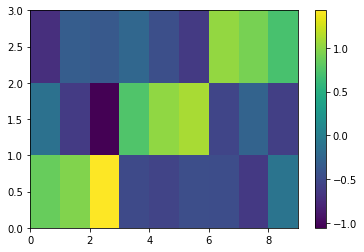

In [18]:
plt.pcolormesh(log_reg.coef_)
plt.colorbar()